<a href="https://colab.research.google.com/github/Ayanlola2002/DATA-SCIENCE-PROJECTS/blob/master/Nigerian_Meter_Data_Wrangling_Ayanlowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import holidays
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline

In [3]:
##Wrangling Helper Functions to Use
"""
This function do the reading of data file from file path(i.e drive)
"""
def do_read_data(datafile, dateCol):
    ''' Read the excel file'''
    df = pd.read_excel(datafile, index_col= dateCol, parse_dates=True)
    return df

"""
This function Shows Information of the Data file
Like The Header columns, Dimension of Data
"""

def do_data_information(datafile, info = False, head = True, shape = True):
    ''' Look at the info of the data'''
    
    if not isinstance(datafile, pd.DataFrame):
        df = read_data(datafile)
    else:
        df = datafile
    
    ## Information of data
    if info:
        df.info()
        
    print('--------------------------------------------------------------------')
    print('First rows')
    # Show first rows
    if head:
        print(df.head())
        
    print('--------------------------------------------------------------------')
    print('Dimension of the data')
    ## Dimension of data
    if shape:
        print(f'This data has {df.shape[0]} rows and {df.shape[1]} variables') 
        
###This function returns the number of distinct values from any columns       
def do_unique_values(df, col):
    ''' Find the unique values of a columns'''
    return df[col].nunique()


###This function statistically describe the data values
def do_description(df, col = None):
    ''' Give the statistic summary'''
    
    ## Summary statistic
    if col is not None:
        stat = df[col].describe()
    else:
        stat = df.describe()

    ## Change the name of the 50% index to median
    idx = stat.index.tolist()
    idx[5] = 'median'
    stat.index = idx
    return stat

###This function finds % Missing values
def check_missing_value(data):
    ## percentage of missing values
    n = data.isnull().sum().sort_values(ascending=False)/ len(data) * 100
    return n

def check_missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  return mis_val_table_ren_columns


###This function finds the amount of each values in a dataset
def do_valueCount(data, col, perc = False):
    ''' calculate the proportion in fraction or percentage'''
    if not perc:
      return data[col].value_counts()
    else:
      return data[col].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'    
### This function count number of unique values for all columns in a dataset
def do_nunique_value(df):
  print('The Numver of unique values per columns are as follows')
  print(df.agg(['nunique']).T)


###For date time conversion start here   
def do_date_col_convertion(df, column_name):
  df[column_name]=pd.to_datetime(df[column_name])
  return df[column_name]

def do_time_col_convertion(df, column_name):
    return pd.to_timedelta(df[column_name])


def do_datepart_extraction(data):
  data['date'] = pd.to_datetime(data['date'])
  data['dateOnly']=data['date'].dt.date
  data['year'] = data['date'].dt.year
  data['quarter']=data['date'].dt.quarter
  data['month'] = data['date'].dt.month
  data['weekday'] = data['date'].dt.weekday
  data['day_name'] = data['date'].dt.day_name()
  data['dayofyear'] = data['date'].dt.dayofyear
  data['day'] =data['date'].dt.day
  data['hour'] = data['date'].dt.hour
  data['minute'] =data['date'].dt.minute
  #data['Season']=data['month'].apply(do_year_season)
  data['season'] = data.date.map(do_season_of_date)
  data['day_section']=data['hour'].apply(do_day_sections)
  return data
   

def do_season_of_date(date):
  year = str(date.year)
  seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
              'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
              'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
  if date in seasons['spring']:
    return 'spring'
  if date in seasons['summer']:
    return 'summer'
  if date in seasons['autumn']:
    return 'autumn'
  else:
    return 'winter'

# Assuming df has a date column of type `datetime`
#df['season'] = df.date.map(season_of_date)


def do_day_sections(x):
  if (x > 4) and (x <= 8):
    return 'Early Morning'
  elif (x > 8) and (x <= 12 ):
    return 'Morning'
  elif (x > 12) and (x <= 16):
    return'Noon'
  elif (x > 16) and (x <= 20) :
    return 'Evening'
  elif (x > 20) and (x <= 24):
    return'Night'
  elif (x <= 4):
    return'Late Night'




def get_holidays(startYear = 2018, endYear = 2025, countryCode = 'ZA'):
  """
    Takes in a start and end date, and start and end year.
    
    Produces a dataframe with a daily date and columns:
    holiday - 'Y' for holiday
    holidayName - name of the holiday if holiday is 'Y'
    
    Returns a dataframe
  """
  holidayDict = {}
  for i in range(startYear, endYear):
    for date, name in sorted(holidays.CountryHoliday(countryCode,years=[i]).items()):
      holidayDict[date] = name
      holiday_df = pd.DataFrame(list(holidayDict.items()),columns = ['day','holidayName'])
      holiday_df['day'] = pd.to_datetime(holiday_df['day'], format='%Y-%M-%d').dt.date
    return holiday_df
    

    
def get_days(start = '1/1/2018',startYear = 2018, end = '31/12/2025',endYear = 2025, countryCode = 'ZA'):
    """
    Takes in a start and end date, and start and end year.
    
    Produces a dataframe with a daily date and columns:
    weekend - 'Y' for weendend and 'N' for workday
    dayOfweek - numerical day of the week identifier 0 for monday
    weekNum - numerical number of the week 
    holiday - 'Y' for holiday
    holidayName - name of the holiday if holiday is 'Y'
    
    Returns a dataframe
    """
    
    #generate the range of daily dates
    dates = pd.date_range(start = start, end = end)
    date_df = pd.DataFrame(dates, columns = ['day'])
    date_df['day'] = pd.to_datetime(date_df['day'], format='%Y-%M-%d')
    country_holidays = get_holidays(startYear = startYear, endYear = endYear, countryCode = countryCode)
    
    date_df['dayName'] = pd.DatetimeIndex(date_df['day']).day_name()
    date_df['dayOfWeek'] = date_df['day'].dt.dayofweek
    date_df['weekend'] = date_df['dayOfWeek'].apply(lambda x: 'Y' if x>4 else 'N')
    date_df['weekNum'] = date_df['day'].dt.week
    date_df['holiday'] = date_df['day'].apply(lambda x: 'Y' if x in country_holidays['day'].values else 'N')
    date_df['day'] = date_df['day'].dt.date
    date_df = date_df.merge(country_holidays, on='day', how='left', indicator=False)
    
    date_df.to_csv(f'../data/public_holidays_weekends.csv', index=False)
    return date_df

###Functions to impute nan values for numerical varriable
def Impute_nan(df):
  numericalcol = [f for f in df_5min.columns if df_5min.dtypes[f] != 'object']
  missing_col=df_5min[numericalcol].columns[df_5min[numericalcol].isnull().any()].tolist()
  #Technique 1: Using mean to impute the missing values
  for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

def Impute_na(df):
  numericalcol = [f for f in df_5min.columns if df_5min.dtypes[f] != 'object']
  missing_col=df_5min[numericalcol].columns[df_5min[numericalcol].isnull().any()].tolist()
  #Technique 1: Using mean to impute the missing values
  for i in missing_col:
     df[i].fillna(mean,inplace=True)


#dataList=[df_5min,df_hourly,df_daily,df_monthly]

def do_wrangling_task(dL):
  for i in range(len(dL)):
    print(do_data_information(dL[i]))
    print('===============================================')
    print(check_missing_values_table(dL[i]))
    print('===============================================')
    print(do_nunique_value(dL[i]))
    print('===============================================')
    #Feature Engineering
    dL[i]=do_datepart_extraction(dL[i])
    print('===============================================')
    dL[i].date.min(),dL[i].date.max()
    print('===============================================')
    dL[i].consumption.min(),dL[i].consumption.max()
    print('===============================================')
    #checking for days where there weere no consumptions
    dL[i][dL[i].consumption==0].value_counts().count(),dL[i][dL[i].consumption==0].value_counts()
    print('===============================================')
    dL[i]['Public_Holiday'] = dL[i]['dateOnly'].map(mapping)
    print('===============================================')
    dL[i]['Public_Holiday']=dL[i]['Public_Holiday'].apply(lambda x:np.NaN if isinstance(x, str) and (x.isspace() or not x) else x).replace(np.NaN,'Non_Holiday')
    print('===============================================')
    dL[i]=dL[i][['date','timestamp','year','quarter','month','dayofyear','day','day_name','hour','minute','season','day_section','Public_Holiday','consumption','solar','alwaysOn','gridImport','gridExport','selfConsumption','selfSufficiency','active','reactive','voltages','phaseVoltages','currentHarmonics','voltageHarmonics']]
    print('===============================================')
    print('===============================================')

# load helper functions for dynamic import
def import_package(name):
    try:
        module = __import__(name)
    except:
        if name == 'pandas_profiling':
          ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
        module = __import__(name)
    try:
        print(f'{name}'+ ' Version:', module.__version__)
    except AttributeError:
        pass
    return module



def plot_period(df, date1, date2, column, title):
    
    df = df.loc[date1:date2]
    
    fig, axs = plt.subplots(1,1, figsize = (12, 6))
    
    fig.suptitle(title)
    
    x = df['datetime']
    
    axs.plot(x, df[column], label=column)
    axs.legend(loc="best")

    plt.show()


def create_monthly_profiles(df, column):
    
    months = df['monthName'].unique()
    
    df = df.groupby([df['weekend'], df['monthName'], df['hour']]).mean()
       
    fig, axs = plt.subplots(1, 2, figsize=(10,6), sharey=True, sharex=True)
    
    fig.suptitle('Weekend and Weekday Profiles')
    
    x = list(range(0,24))
    plt.xticks(x)
    
    # Loop through each month of the year and plot profile
    for month in months:
        
        axs[0].plot(x, df.loc[0, month][column], label=month)
        axs[0].legend(loc="best")
        axs[0].set_title('Weekday')

        axs[1].plot(x, df.loc[1, month][column], label=month)
        axs[1].legend(loc="best")
        axs[1].set_title('Weekend')
        
            
    plt.show()
    
    return df

def load_data(file):
    df = pd.read_csv(file)
    df = df.astype({'date':'datetime64[ns]'})
    df.sort_values(by='date', inplace=True)
    return df

def load_data1(file):
  df = pd.read_csv(file)
  return df

#df['holidays']=df['date'].apply(lambda(x: 'Hols' if x in get_holidays()['day'].values else 'Non-Hols'))



In [5]:
asset1 = "/content/drive/MyDrive/NEEDENERGY/Release2/release_2_20190601-20200424_smart_meter_DATA.csv"
#asset2="/content/drive/MyDrive/NEEDENERGY/Release2/release_2_20200429_README.pdf"
asset2="/content/drive/MyDrive/NEEDENERGY/Release2/release_2_20200429_smart_meter_LIST.csv"

In [6]:
pd = import_package('pandas')
profile = import_package('pandas_profiling')
np = import_package('numpy')
tz = import_package('dateutil').tz
datetime = import_package('datetime').datetime
msno = import_package('missingno')

pandas Version: 1.1.5
pandas_profiling Version: 2.12.0
numpy Version: 1.19.5
dateutil Version: 2.8.1
missingno Version: 0.4.2


In [7]:

df1= load_data1(asset1)
df2=load_data1(asset2)


In [8]:
#change column of datetime to date type and sort
df1 = df1.astype({'record_time':'datetime64[ns]'})


In [9]:
df1.head()

meter_number         record_time  meter_count  a_voltage  a_current  \
0        541806 2019-06-07 13:13:00        50.07      209.8       3.03   
1        541806 2019-06-07 13:17:00        50.07      209.8       3.03   
2        541806 2019-06-07 17:18:00        50.11      203.7       1.94   
3        541806 2019-06-07 17:22:00        50.11      203.7       1.94   
4        541806 2019-06-07 17:30:00        50.17      205.4       1.88   

   a_power  a_power_factor  frequency  
0     0.44            0.87      50.43  
1     0.44            0.87      50.43  
2     0.37            0.94      48.80  
3     0.37            0.94      48.80  
4     0.36            0.94      49.36

In [10]:
df1.sort_values(by='record_time', inplace=True)

In [11]:
df1.head()

meter_number         record_time  meter_count  a_voltage  a_current  \
1710254        541955 2019-06-01 00:00:00          NaN     203.46       2.23   
1205236        541907 2019-06-01 00:01:00          NaN     180.07       2.52   
1412030        541921 2019-06-01 00:05:00          NaN     219.82       8.17   
1670638        541947 2019-06-01 00:07:00          NaN     207.49       1.97   
1205237        541907 2019-06-01 00:08:00          NaN     182.07       2.50   

         a_power  a_power_factor  frequency  
1710254     0.40            0.88        0.0  
1205236     0.40            0.88        0.0  
1412030     1.58            0.88        0.0  
1670638     0.36            0.88        0.0  
1205237     0.40            0.88        0.0

Data Quality Information:
df: The data has 1416 rows and 5 features

In [12]:
#basic profiling
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348980 entries, 1710254 to 2211465
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   meter_number    int64         
 1   record_time     datetime64[ns]
 2   meter_count     float64       
 3   a_voltage       float64       
 4   a_current       float64       
 5   a_power         float64       
 6   a_power_factor  float64       
 7   frequency       float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 161.3 MB


In [13]:
#statistcal summary
df1.describe()


meter_number   meter_count     a_voltage     a_current       a_power  \
count  2.348980e+06  2.348311e+06  2.348980e+06  2.348980e+06  2.348980e+06   
mean   5.420334e+05  1.620603e+02  2.111575e+02  1.316702e+00  2.393636e-01   
std    7.421828e+02  1.884084e+02  2.661118e+01  1.323834e+00  2.450129e-01   
min    5.418060e+05 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%    5.418510e+05  3.328000e+01  1.947000e+02  3.600000e-01  6.000000e-02   
50%    5.419040e+05  1.011900e+02  2.131000e+02  1.040000e+00  1.900000e-01   
75%    5.419610e+05  2.142500e+02  2.256000e+02  1.790000e+00  3.300000e-01   
max    5.462590e+05  1.285770e+03  4.360000e+02  2.214000e+01  3.034000e+01   

       a_power_factor     frequency  
count    2.348980e+06  2.348980e+06  
mean     8.990091e-01  4.828793e+01  
std      1.000962e-01  8.760467e+00  
min     -1.000000e+00 -1.000000e+00  
25%      8.600000e-01  4.777000e+01  
50%      9.100000e-01  5.024000e+01  
75%      9.800000e-01  5.058000e+01  
max      1.000000e+00  6.000000e+01

In [14]:
#List of features
df1.columns

Index(['meter_number', 'record_time', 'meter_count', 'a_voltage', 'a_current',
       'a_power', 'a_power_factor', 'frequency'],
      dtype='object')

In [15]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [16]:
from pandas_profiling import ProfileReport

In [17]:
profile=ProfileReport(df1,title='Nigeria Meter Dataset Report',html={'style':{'full_width':True}})


In [18]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df1_new = df1.copy()

In [20]:
df1_new.head()

meter_number         record_time  meter_count  a_voltage  a_current  \
1710254        541955 2019-06-01 00:00:00          NaN     203.46       2.23   
1205236        541907 2019-06-01 00:01:00          NaN     180.07       2.52   
1412030        541921 2019-06-01 00:05:00          NaN     219.82       8.17   
1670638        541947 2019-06-01 00:07:00          NaN     207.49       1.97   
1205237        541907 2019-06-01 00:08:00          NaN     182.07       2.50   

         a_power  a_power_factor  frequency  
1710254     0.40            0.88        0.0  
1205236     0.40            0.88        0.0  
1412030     1.58            0.88        0.0  
1670638     0.36            0.88        0.0  
1205237     0.40            0.88        0.0

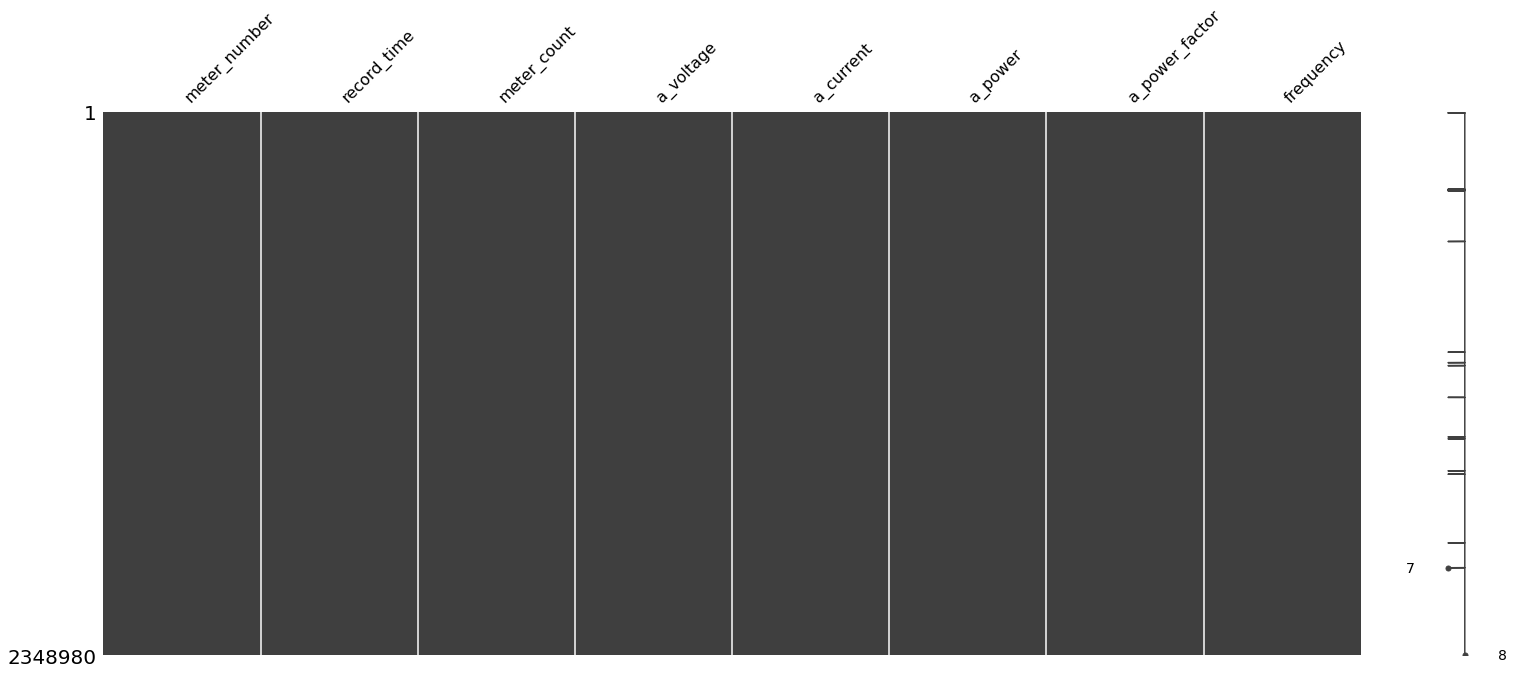

In [21]:
# Check for missing info using Missingno Package

msno.matrix(df1_new)

In [23]:
# Checking if there are any periods of zero values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = df1_new.select_dtypes(include=numerics).columns 
for feature in features: 
    zero_results = df1_new[df1_new[feature]==0]
zero_results.head()

meter_number         record_time  meter_count  a_voltage  a_current  \
1710254        541955 2019-06-01 00:00:00          NaN     203.46       2.23   
1205236        541907 2019-06-01 00:01:00          NaN     180.07       2.52   
1412030        541921 2019-06-01 00:05:00          NaN     219.82       8.17   
1670638        541947 2019-06-01 00:07:00          NaN     207.49       1.97   
1205237        541907 2019-06-01 00:08:00          NaN     182.07       2.50   

         a_power  a_power_factor  frequency  
1710254     0.40            0.88        0.0  
1205236     0.40            0.88        0.0  
1412030     1.58            0.88        0.0  
1670638     0.36            0.88        0.0  
1205237     0.40            0.88        0.0

In [25]:
#cheching how many zeros are there in Wind columns
#and date range
df1_new[df1_new['frequency']==0]

meter_number         record_time  meter_count  a_voltage  a_current  \
1710254        541955 2019-06-01 00:00:00          NaN     203.46       2.23   
1205236        541907 2019-06-01 00:01:00          NaN     180.07       2.52   
1412030        541921 2019-06-01 00:05:00          NaN     219.82       8.17   
1670638        541947 2019-06-01 00:07:00          NaN     207.49       1.97   
1205237        541907 2019-06-01 00:08:00          NaN     182.07       2.50   
...               ...                 ...          ...        ...        ...   
1632546        541943 2020-04-23 21:02:00       136.17     168.00       2.55   
1632547        541943 2020-04-23 21:11:00       136.23     171.80       2.51   
1632548        541943 2020-04-23 21:14:00       136.25     176.30       2.48   
1469998        541926 2020-04-23 21:32:00       385.53     174.80       0.58   
1469999        541926 2020-04-23 21:36:00       385.54     178.00       0.59   

         a_power  a_power_factor  frequency  
1710254     0.40            0.88        0.0  
1205236     0.40            0.88        0.0  
1412030     1.58            0.88        0.0  
1670638     0.36            0.88        0.0  
1205237     0.40            0.88        0.0  
...          ...             ...        ...  
1632546     0.39            0.89        0.0  
1632547     0.41            0.89        0.0  
1632548     0.38            0.89        0.0  
1469998     0.09            0.92        0.0  
1469999     0.09            0.92        0.0  

[64482 rows x 8 columns]

In [26]:
df1_new.frequency.isnull().sum()

0

In [27]:
# Are there missing time steps
start = df1_new['record_time'].min()
end = df1_new['record_time'].max()
full_index = pd.date_range(start, end, freq='H')
len(full_index) == len(df1_new)

False

In [28]:
#set date time as index of dataset 
df1_new.set_index('record_time', inplace = True)
df1_new.index


DatetimeIndex(['2019-06-01 00:00:00', '2019-06-01 00:01:00',
               '2019-06-01 00:05:00', '2019-06-01 00:07:00',
               '2019-06-01 00:08:00', '2019-06-01 00:08:00',
               '2019-06-01 00:12:00', '2019-06-01 00:13:00',
               '2019-06-01 00:13:00', '2019-06-01 00:15:00',
               ...
               '2020-04-23 23:53:00', '2020-04-23 23:54:00',
               '2020-04-23 23:55:00', '2020-04-23 23:55:00',
               '2020-04-23 23:55:00', '2020-04-23 23:56:00',
               '2020-04-23 23:56:00', '2020-04-23 23:57:00',
               '2020-04-23 23:58:00', '2020-04-23 23:59:00'],
              dtype='datetime64[ns]', name='record_time', length=2348980, freq=None)

In [29]:

#Get range
print(f"Startdate:\t{df1_new.index.min()}")
print(f"Enddate:\t{df1_new.index.max()}")

Startdate:	2019-06-01 00:00:00
Enddate:	2020-04-23 23:59:00


In [30]:
#Check for duplicates
df1_new.index[df1_new.index.duplicated(keep=False)==True]

DatetimeIndex(['2019-06-01 00:08:00', '2019-06-01 00:08:00',
               '2019-06-01 00:13:00', '2019-06-01 00:13:00',
               '2019-06-01 00:25:00', '2019-06-01 00:25:00',
               '2019-06-01 01:11:00', '2019-06-01 01:11:00',
               '2019-06-01 01:38:00', '2019-06-01 01:38:00',
               ...
               '2020-04-23 23:50:00', '2020-04-23 23:51:00',
               '2020-04-23 23:51:00', '2020-04-23 23:52:00',
               '2020-04-23 23:52:00', '2020-04-23 23:55:00',
               '2020-04-23 23:55:00', '2020-04-23 23:55:00',
               '2020-04-23 23:56:00', '2020-04-23 23:56:00'],
              dtype='datetime64[ns]', name='record_time', length=2276453, freq=None)

In [31]:
#Create new series with all timestamps in the timeframe above and reseting DF Index to that series
date_rng = pd.date_range(start=df1_new.index.min(), end=df1_new.index.max(), freq='H')
#df1_new = df1_new.reindex(date_rng)
df1_new.index

DatetimeIndex(['2019-06-01 00:00:00', '2019-06-01 00:01:00',
               '2019-06-01 00:05:00', '2019-06-01 00:07:00',
               '2019-06-01 00:08:00', '2019-06-01 00:08:00',
               '2019-06-01 00:12:00', '2019-06-01 00:13:00',
               '2019-06-01 00:13:00', '2019-06-01 00:15:00',
               ...
               '2020-04-23 23:53:00', '2020-04-23 23:54:00',
               '2020-04-23 23:55:00', '2020-04-23 23:55:00',
               '2020-04-23 23:55:00', '2020-04-23 23:56:00',
               '2020-04-23 23:56:00', '2020-04-23 23:57:00',
               '2020-04-23 23:58:00', '2020-04-23 23:59:00'],
              dtype='datetime64[ns]', name='record_time', length=2348980, freq=None)

In [32]:
type(df1_new.index)

pandas.core.indexes.datetimes.DatetimeIndex

Feature Engineering Time Series

In [33]:
df1_new.reset_index(inplace=True)
df1_new.rename(columns = {'index':'record_time'}, inplace = True)
df1_new.head()

record_time  meter_number  meter_count  a_voltage  a_current  \
0 2019-06-01 00:00:00        541955          NaN     203.46       2.23   
1 2019-06-01 00:01:00        541907          NaN     180.07       2.52   
2 2019-06-01 00:05:00        541921          NaN     219.82       8.17   
3 2019-06-01 00:07:00        541947          NaN     207.49       1.97   
4 2019-06-01 00:08:00        541907          NaN     182.07       2.50   

   a_power  a_power_factor  frequency  
0     0.40            0.88        0.0  
1     0.40            0.88        0.0  
2     1.58            0.88        0.0  
3     0.36            0.88        0.0  
4     0.40            0.88        0.0

In [34]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348980 entries, 0 to 2348979
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   record_time     datetime64[ns]
 1   meter_number    int64         
 2   meter_count     float64       
 3   a_voltage       float64       
 4   a_current       float64       
 5   a_power         float64       
 6   a_power_factor  float64       
 7   frequency       float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 143.4 MB


In [35]:
#changing all 0 to Nan values for meter_count  imputation
df1_new['meter_count'] = df1_new['meter_count'].replace(0,np.nan)

In [36]:
#Feature Engineering of Time Series
df1_new['date'] = df1_new['record_time'].dt.strftime('%Y-%m-%d')
df1_new['year'] = df1_new['record_time'].dt.year 
df1_new['dayOfYear'] = df1_new['record_time'].dt.dayofyear
df1_new['month'] = df1_new['record_time'].dt.month 
df1_new['monthName'] = pd.DatetimeIndex(df1_new['record_time']).month_name()
df1_new['week'] = df1_new['record_time'].dt.week
df1_new['day'] = df1_new['record_time'].dt.day
df1_new['dayName'] = pd.DatetimeIndex(df1_new['record_time']).day_name()
df1_new['hour'] = df1_new['record_time'].dt.hour
df1_new['minute'] = df1_new['record_time'].dt.minute
df1_new['dayOfWeek'] = df1_new['record_time'].dt.dayofweek
df1_new['weekend'] = df1_new['dayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df1_new['time'] = df1_new['record_time'].dt.time 
df1_new['time_Str'] = df1_new['record_time'].dt.time.astype(str)   
df1_new['dayMonth'] = df1_new["record_time"].dt.strftime('%m-%d')
df1_new['hourMinute'] = df1_new["record_time"].dt.strftime('%H:%M')

bins = [0,4,8,12,16,20,24]
labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df1_new['session'] = pd.cut(df1_new['hour'], bins=bins, labels=labels, include_lowest=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [37]:
#Displaying all meter_count with nan
df1_new[df1_new['meter_count'].isnull()]

record_time  meter_number  meter_count  a_voltage  a_current  \
0       2019-06-01 00:00:00        541955          NaN     203.46       2.23   
1       2019-06-01 00:01:00        541907          NaN     180.07       2.52   
2       2019-06-01 00:05:00        541921          NaN     219.82       8.17   
3       2019-06-01 00:07:00        541947          NaN     207.49       1.97   
4       2019-06-01 00:08:00        541907          NaN     182.07       2.50   
...                     ...           ...          ...        ...        ...   
2348964 2020-04-23 23:50:00        541938          NaN     223.00       0.00   
2348965 2020-04-23 23:50:00        546245          NaN     223.40       0.00   
2348972 2020-04-23 23:55:00        546245          NaN     223.40       0.00   
2348973 2020-04-23 23:55:00        541904          NaN     223.00       0.00   
2348974 2020-04-23 23:55:00        541938          NaN     223.50       0.00   

         a_power  a_power_factor  frequency        date  year  dayOfYear  \
0           0.40            0.88       0.00  2019-06-01  2019        152   
1           0.40            0.88       0.00  2019-06-01  2019        152   
2           1.58            0.88       0.00  2019-06-01  2019        152   
3           0.36            0.88       0.00  2019-06-01  2019        152   
4           0.40            0.88       0.00  2019-06-01  2019        152   
...          ...             ...        ...         ...   ...        ...   
2348964     0.00            1.00      50.33  2020-04-23  2020        114   
2348965     0.00            1.00      50.32  2020-04-23  2020        114   
2348972     0.00            1.00      50.31  2020-04-23  2020        114   
2348973     0.00            1.00      50.33  2020-04-23  2020        114   
2348974     0.00            1.00      50.32  2020-04-23  2020        114   

         month monthName  week  day   dayName  hour  minute  dayOfWeek  \
0            6      June    22    1  Saturday     0       0          5   
1            6      June    22    1  Saturday     0       1          5   
2            6      June    22    1  Saturday     0       5          5   
3            6      June    22    1  Saturday     0       7          5   
4            6      June    22    1  Saturday     0       8          5   
...        ...       ...   ...  ...       ...   ...     ...        ...   
2348964      4     April    17   23  Thursday    23      50          3   
2348965      4     April    17   23  Thursday    23      50          3   
2348972      4     April    17   23  Thursday    23      55          3   
2348973      4     April    17   23  Thursday    23      55          3   
2348974      4     April    17   23  Thursday    23      55          3   

         weekend      time  time_Str dayMonth hourMinute     session  
0              1  00:00:00  00:00:00    06-01      00:00  Late Night  
1              1  00:01:00  00:01:00    06-01      00:01  Late Night  
2              1  00:05:00  00:05:00    06-01      00:05  Late Night  
3              1  00:07:00  00:07:00    06-01      00:07  Late Night  
4              1  00:08:00  00:08:00    06-01      00:08  Late Night  
...          ...       ...       ...      ...        ...         ...  
2348964        0  23:50:00  23:50:00    04-23      23:50       Night  
2348965        0  23:50:00  23:50:00    04-23      23:50       Night  
2348972        0  23:55:00  23:55:00    04-23      23:55       Night  
2348973        0  23:55:00  23:55:00    04-23      23:55       Night  
2348974        0  23:55:00  23:55:00    04-23      23:55       Night  

[183794 rows x 25 columns]

In [38]:
#Data Imputation
#Nan values are more prevalent in month of june 2019 for 
new_df=df1_new[(df1_new.year==2019) & (df1_new.month==6) ][df1_new['meter_count'].isnull()]
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


record_time  meter_number  meter_count  a_voltage  a_current  \
0     2019-06-01 00:00:00        541955          NaN     203.46       2.23   
1     2019-06-01 00:01:00        541907          NaN     180.07       2.52   
2     2019-06-01 00:05:00        541921          NaN     219.82       8.17   
3     2019-06-01 00:07:00        541947          NaN     207.49       1.97   
4     2019-06-01 00:08:00        541907          NaN     182.07       2.50   
...                   ...           ...          ...        ...        ...   
70284 2019-06-18 18:30:00        541915          NaN     195.40       0.43   
76030 2019-06-19 11:27:00        541822          NaN     198.50       1.09   
76070 2019-06-19 11:30:00        541822          NaN     198.50       1.09   
96560 2019-06-21 11:30:00        541827          NaN     225.10       1.06   
96596 2019-06-21 11:35:00        541827          NaN     225.10       1.06   

       a_power  a_power_factor  frequency        date  year  dayOfYear  month  \
0         0.40            0.88       0.00  2019-06-01  2019        152      6   
1         0.40            0.88       0.00  2019-06-01  2019        152      6   
2         1.58            0.88       0.00  2019-06-01  2019        152      6   
3         0.36            0.88       0.00  2019-06-01  2019        152      6   
4         0.40            0.88       0.00  2019-06-01  2019        152      6   
...        ...             ...        ...         ...   ...        ...    ...   
70284     0.08            1.00      50.03  2019-06-18  2019        169      6   
76030     0.21            0.98      48.42  2019-06-19  2019        170      6   
76070     0.21            0.98      48.42  2019-06-19  2019        170      6   
96560     0.21            0.87      50.11  2019-06-21  2019        172      6   
96596     0.21            0.87      50.11  2019-06-21  2019        172      6   

      monthName  week  day    dayName  hour  minute  dayOfWeek  weekend  \
0          June    22    1   Saturday     0       0          5        1   
1          June    22    1   Saturday     0       1          5        1   
2          June    22    1   Saturday     0       5          5        1   
3          June    22    1   Saturday     0       7          5        1   
4          June    22    1   Saturday     0       8          5        1   
...         ...   ...  ...        ...   ...     ...        ...      ...   
70284      June    25   18    Tuesday    18      30          1        0   
76030      June    25   19  Wednesday    11      27          2        0   
76070      June    25   19  Wednesday    11      30          2        0   
96560      June    25   21     Friday    11      30          4        0   
96596      June    25   21     Friday    11      35          4        0   

           time  time_Str dayMonth hourMinute     session  
0      00:00:00  00:00:00    06-01      00:00  Late Night  
1      00:01:00  00:01:00    06-01      00:01  Late Night  
2      00:05:00  00:05:00    06-01      00:05  Late Night  
3      00:07:00  00:07:00    06-01      00:07  Late Night  
4      00:08:00  00:08:00    06-01      00:08  Late Night  
...         ...       ...      ...        ...         ...  
70284  18:30:00  18:30:00    06-18      18:30         Eve  
76030  11:27:00  11:27:00    06-19      11:27     Morning  
76070  11:30:00  11:30:00    06-19      11:30     Morning  
96560  11:30:00  11:30:00    06-21      11:30     Morning  
96596  11:35:00  11:35:00    06-21      11:35     Morning  

[4083 rows x 25 columns]

In [39]:
new_df.record_time.min(),new_df.record_time.max()

(Timestamp('2019-06-01 00:00:00'), Timestamp('2019-06-21 11:35:00'))

In [40]:
#imputing all meter_count values with mean values
df1_new['meter_count']=df1_new['meter_count'].fillna(df1_new.meter_count.mean())

Remove Duplicates

In [41]:
#New columns 
df1_new.columns


Index(['record_time', 'meter_number', 'meter_count', 'a_voltage', 'a_current',
       'a_power', 'a_power_factor', 'frequency', 'date', 'year', 'dayOfYear',
       'month', 'monthName', 'week', 'day', 'dayName', 'hour', 'minute',
       'dayOfWeek', 'weekend', 'time', 'time_Str', 'dayMonth', 'hourMinute',
       'session'],
      dtype='object')

In [42]:
#Reordering columns

orderOfcols = ['record_time', 'date', 'year', 'dayMonth', 'time', 'time_Str', 'hourMinute', 'session', 'monthName', 'dayName', 
             'dayOfYear', 'week', 'month', 'day', 'hour', 'minute', 'dayOfWeek', 'weekend', 'workingDay','meter_number','a_voltage','a_current','a_power','a_power_factor','frequency','meter_count']
df1_new =df1_new.reindex(columns=orderOfcols)

* reocrds 2348980
* varriables 9
* Missing cells based on meter_count

* meter_count
zeros=183125
null=669
recommended dropped

* a_current
zeros=469838 ;
null=0

* a_power
zeros=477005 ;
null=0

* frequency
zeros=64482 ;
null=0


* looks like there are missing timesteps